# Oasis Infobytes - Internship
## Task 2 - Unemployement Analysis with Python

## Problem Statement -
Unemployement is measured by the unemployement rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployement rate during covid-19, so analyse the unemployement rate with the given dataset in python.

In [47]:
#Import libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [48]:
#Load the dataset
df = pd.read_csv('E:/Data Science/4. Oasis (15 Mar - 15 Apr)/Project/2. Unemployement Rate Analysis/unemployement_rate.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [49]:
#Check Shape of the dataset
df.shape

(768, 7)

In [50]:
#Check all information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [51]:
#Check for null values
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [52]:
#Drop Nan values
df.dropna(inplace = True)

In [53]:
#check again for null values
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [54]:
#check again for the shape of dataset
df.shape

(740, 7)

In [55]:
#check statistics of dataset
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [56]:
#Rename column names
df.columns = ['State', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate','Region']

In [57]:
#Show data
df

,State,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


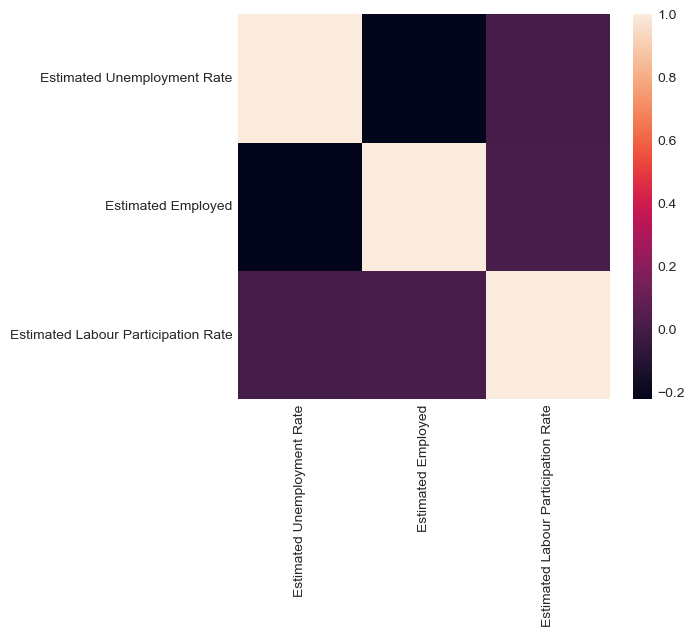

In [59]:
#Correlation metrics between variables
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(6,5))
sns.heatmap(df.corr())
plt.show()

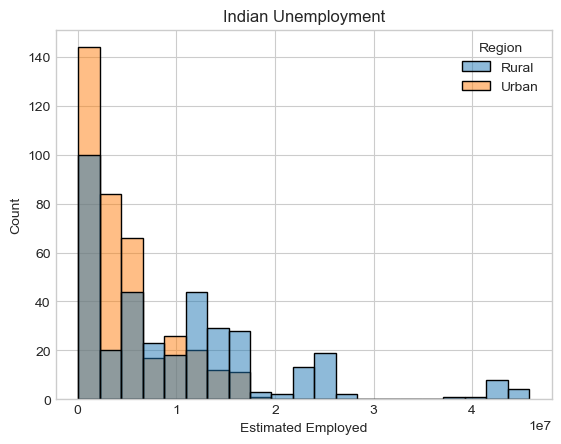

In [60]:
#Plot histogram for Estimated Employed in different region
df.columns = ['State', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate','Region']
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Employed", hue="Region", data = df)
plt.show()

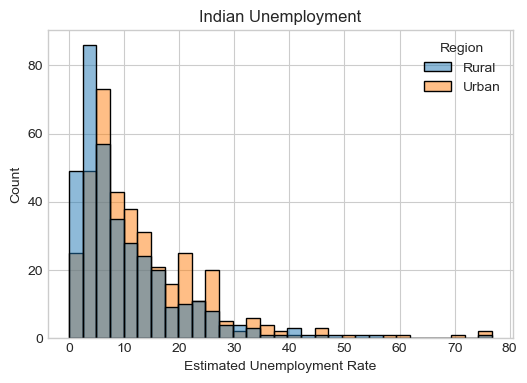

In [61]:
#Plot histogram for Estimated Unemloyment Rate in different regions
plt.figure(figsize=(6,4))
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Unemployment Rate", hue="Region", data=df)
plt.show()

In [62]:
#Dashboard for Estimated Unemployment Rate in Region and State
unemployment = df[['State','Region','Estimated Unemployment Rate']]
figure = px.sunburst(unemployment,path=['Region','State'],
                    values='Estimated Unemployment Rate',
                    width=800, height=800, color_continuous_scale='RDY1Gn',
                    title='Unemployment Rate in India')
figure.show()